In [7]:
import quandl
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn import preprocessing, cross_validation
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
quandl.ApiConfig.api_key = 'DEN8cmx6MYrtzyeUdDeh'

In [5]:
%%time
tickers = ['FB']
           #'GOOGL','AAPl','AMZN','TSLA','MSFT','AMD','INTC','T','NFLX']
Validate = []
Train = []
for ticker in tickers:
    df = quandl.get("WIKI/"+ticker)
    df = df.iloc[-500:]
    func = ['mean','std','skew','kurt']
    time = [2,4,7,30,60,120,250]
    Z = pd.DataFrame()
    for f in func:
        for t in time:
            aux = pd.DataFrame()
            for i in range(249):
                aux[df.index[i+251]] = list(df.iloc[i-t+251:i+251]['Adj. Close'])
            Z[f+str(t)] = aux.apply(f,axis=0)  
    Z.drop(['skew2','kurt2'],axis=1, inplace =True)
    W = pd.merge(Z, df[['Adj. Close']],left_index=True,right_index=True)
    X = W.drop(['Adj. Close'],1).fillna(0)
    y = W[['Adj. Close']]
    mm1 = MinMaxScaler()
    mm2 = MinMaxScaler()
    mm1.fit(X)
    mm2.fit(y)
    Xm = pd.DataFrame(mm1.transform(X))
    ym = pd.DataFrame(mm2.transform(y))
    Xt, Xv, yt, yv = cross_validation.train_test_split(Xm, ym, test_size = 0.3)
    model =  XGBRegressor()
    model.fit(Xm,ym)
    print ticker
    print 'ACC Validate {:.2%}'.format(model.score(Xv,yv))
    print 'ACC Train    {:.2%}'.format(model.score(Xt,yt))
    Validate.append(model.score(Xv,yv))
    Train.append(model.score(Xt,yt))
print 'Promedio Validate  {:.2%}'.format(np.array(Validate).mean())
print 'Promedio Train     {:.2%}'.format(np.array(Train).mean())

FB
ACC Validate 99.52%
ACC Train    99.56%
Promedio Validate  99.52%
Promedio Train     99.56%
CPU times: user 7.93 s, sys: 36.7 ms, total: 7.97 s
Wall time: 8.88 s


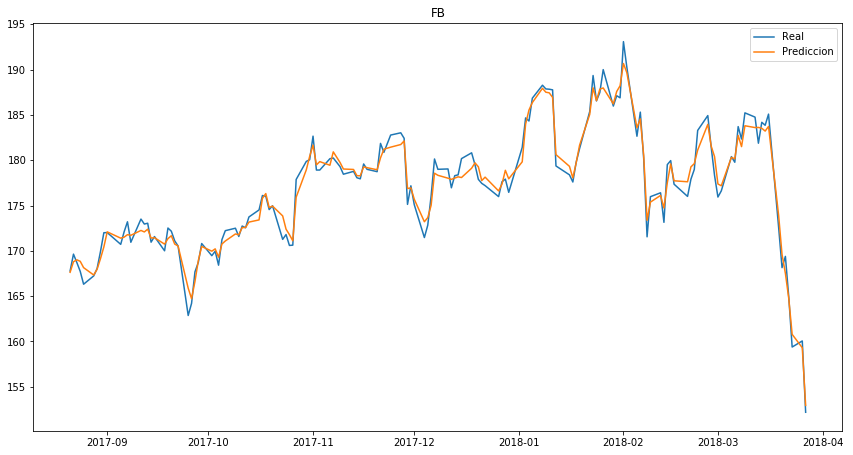

In [25]:
    pred = pd.DataFrame(model.predict(Xm[-150:]))
    x = Z.index[-150:]
    plt.plot(x, list(y['Adj. Close'][-150:]), label='Real')
    plt.plot(x, mm2.inverse_transform(pred), label='Prediccion')
    plt.title(ticker)
    plt.legend()
    fig = plt.gcf()
    fig.set_size_inches(14.5, 7.5)
    plt.show()

In [24]:
Z.index[-150:]

DatetimeIndex(['2017-08-21', '2017-08-22', '2017-08-23', '2017-08-24',
               '2017-08-25', '2017-08-28', '2017-08-29', '2017-08-30',
               '2017-08-31', '2017-09-01',
               ...
               '2018-03-14', '2018-03-15', '2018-03-16', '2018-03-19',
               '2018-03-20', '2018-03-21', '2018-03-22', '2018-03-23',
               '2018-03-26', '2018-03-27'],
              dtype='datetime64[ns]', length=150, freq=None)